In [2]:
pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 23.5 MB/s eta 0:00:00


In [27]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import MACCSkeys
from rdkit.Chem import DataStructs  # Import DataStructs for TanimotoSimilarity

# Define two molecules as SMILES strings
molecule1_smiles = "COc1ccc(cc1Cl)-n1ccnc(SC(C)C(=O)c2ccc(C)c(C)c2)c1=O"  # Replace with your first molecule's SMILES string
molecule2_smiles = "OC(=O)C1=CC=C(C=C1)N1C(SCC(=O)NC2=CSC(=N2)C2=CSC=C2)=NC2=CC(=CC=C2C1=O)C(=O)N1CCCC1"  # Replace with your second molecule's SMILES string

# Convert SMILES strings to RDKit molecules
molecule1 = Chem.MolFromSmiles(molecule1_smiles)
molecule2 = Chem.MolFromSmiles(molecule2_smiles)

# Check if molecules are valid
if molecule1 is None or molecule2 is None:
    raise ValueError("One or both of the input molecules are invalid.")

# Calculate molecular fingerprints
fp1 = MACCSkeys.GenMACCSKeys(molecule1)
fp2 = MACCSkeys.GenMACCSKeys(molecule2)


# Calculate molecular descriptors (optional)
logP1 = Descriptors.MolLogP(molecule1)
logP2 = Descriptors.MolLogP(molecule2)
mw1 = Descriptors.MolWt(molecule1)
mw2 = Descriptors.MolWt(molecule2)

# Calculate Lipinski's Rule of Five properties
hbd1 = Descriptors.NumHDonors(molecule1)
hbd2 = Descriptors.NumHDonors(molecule2)
hba1 = Descriptors.NumHAcceptors(molecule1)
hba2 = Descriptors.NumHAcceptors(molecule2)

# Print the results
print(f"Molecular properties for molecule 1 - LogP: {logP1}, Molecular Weight: {mw1}")
print(f"Molecular properties for molecule 2 - LogP: {logP2}, Molecular Weight: {mw2}")
print(f"Lipinski's Rule of Five properties for molecule 1 - HBD: {hbd1}, HBA: {hba1}")
print(f"Lipinski's Rule of Five properties for molecule 2 - HBD: {hbd2}, HBA: {hba2}")


Molecular properties for molecule 1 - LogP: 4.874840000000004, Molecular Weight: 428.94100000000026
Molecular properties for molecule 2 - LogP: 5.235700000000005, Molecular Weight: 617.7339999999998
Lipinski's Rule of Five properties for molecule 1 - HBD: 0, HBA: 6
Lipinski's Rule of Five properties for molecule 2 - HBD: 2, HBA: 10


# Display Similar Sub Structures


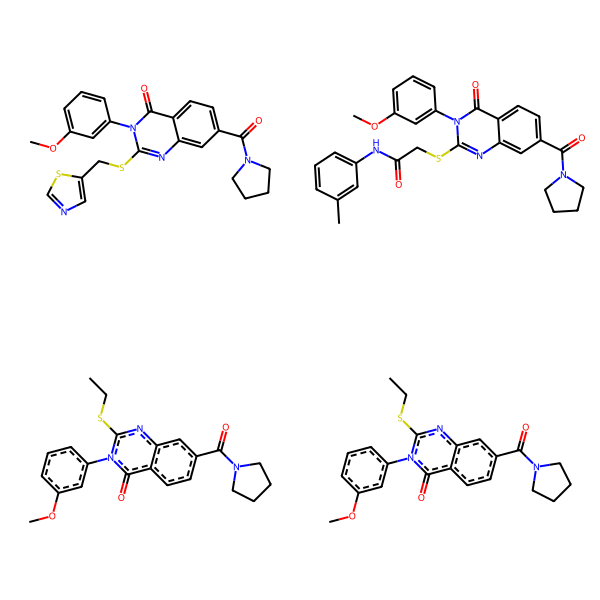

Similarity: 0.65


In [21]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdFMCS
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
from IPython.display import display

def find_common_substructure(molecule1, molecule2):
    # Convert SMILES strings to RDKit molecules
    mol1 = Chem.MolFromSmiles(molecule1)
    mol2 = Chem.MolFromSmiles(molecule2)

    # Generate Morgan fingerprints for the molecules
    fp1 = AllChem.GetMorganFingerprintAsBitVect(mol1, 2, nBits=1024)
    fp2 = AllChem.GetMorganFingerprintAsBitVect(mol2, 2, nBits=1024)

    # Compute the similarity between fingerprints
    similarity = DataStructs.TanimotoSimilarity(fp1, fp2)

    # Find the maximum common substructure (MCS)
    mcs = rdFMCS.FindMCS([mol1, mol2])

    # Get the common substructure as SMARTS
    common_substructure_smarts = mcs.smartsString

    # Highlight the common substructure in the molecules
    mol1_highlighted = Chem.MolFromSmarts(common_substructure_smarts)
    mol2_highlighted = Chem.MolFromSmarts(common_substructure_smarts)

    # Draw the structures
    img = Draw.MolsToGridImage([mol1, mol2, mol1_highlighted, mol2_highlighted], molsPerRow=2, subImgSize=(300, 300))

    # Display the image using IPython.display
    display(img)

    return similarity

# Example usage
molecule1 = "COc1cccc(c1)-n1c(SCC2=CN=CS2)nc2cc(ccc2c1=O)C(=O)N1CCCC1"  # Ethanol
molecule2 = "COC1=CC=CC(=C1)[n]1-c(SCC(=O)NC2=CC=CC(C)=C2)nc2cc(ccc2c1=O)C(=O)N1CCCC1"  # Diethyl ether

similarity = find_common_substructure(molecule1, molecule2)

print(f"Similarity: {similarity:.2f}")


